# 🧪 Car Insurance Pure Premium estimation based on claims data

[![](https://mermaid.ink/img/pako:eNpNkEtvgzAQhP-K5XNyAG4cKoVHemmlKs2hkslhg7fEKtjID7Uoyn_vJpgWn77xjFfrufLWSOQ57yyMF_ZyaDSjsxP1z9gbC97Yie009JNT7hTN7fapEHsEHyyyWndKa7RKd9F34TxPe6XR_dGC0mSKh3Js0Sym76dMxJs1MrR-frO2UnH8RpQK2QE7i84po9d-Jj6eC2Ocj5eo5QwFrVkmK07ZSmRRVMtepRlGsMr9TS8TylWR0xVn_1wR7h9d0afgrHrlpxPf8AHtAEpSr9d7sOH-ggM2PCeUYL8a3ugb5cIowWMtFfXM80_oHW44BG_eJ93y3NuAS6hSQK0OMXX7BZk-iRQ)](https://mermaid.live/edit#pako:eNpNkEtvgzAQhP-K5XNyAG4cKoVHemmlKs2hkslhg7fEKtjID7Uoyn_vJpgWn77xjFfrufLWSOQ57yyMF_ZyaDSjsxP1z9gbC97Yie009JNT7hTN7fapEHsEHyyyWndKa7RKd9F34TxPe6XR_dGC0mSKh3Js0Sym76dMxJs1MrR-frO2UnH8RpQK2QE7i84po9d-Jj6eC2Ocj5eo5QwFrVkmK07ZSmRRVMtepRlGsMr9TS8TylWR0xVn_1wR7h9d0afgrHrlpxPf8AHtAEpSr9d7sOH-ggM2PCeUYL8a3ugb5cIowWMtFfXM80_oHW44BG_eJ93y3NuAS6hSQK0OMXX7BZk-iRQ)

In [ ]:
!pip install mlflow --quiet
!pip install pyngrok --quiet
!pip install sweetviz --quiet
!pip install optuna --quiet
!pip install shap --quiet



     |████████████████████████████████| 17.0 MB 109 kB/s 
     |████████████████████████████████| 209 kB 48.5 MB/s 
     |████████████████████████████████| 79 kB 1.3 MB/s 
     |████████████████████████████████| 181 kB 12.9 MB/s 
     |████████████████████████████████| 146 kB 49.6 MB/s 
     |████████████████████████████████| 77 kB 4.3 MB/s 
     |████████████████████████████████| 78 kB 3.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 59 kB 4.5 MB/s 
     |████████████████████████████████| 745 kB 29.9 MB/s 
     |████████████████████████████████| 15.1 MB 18.2 MB/s 
     |████████████████████████████████| 348 kB 30.9 MB/s 
     |████████████████████████████████| 81 kB 9.6 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 112 kB 76.8 MB/s 
     |████████████████████████████████| 147 kB 77.1 MB/s 
     |███████████████████████

In [ ]:
import pandas as pd
import seaborn as sns
import sweetviz
import os.path
from pyngrok import ngrok
import numpy as np
import mlflow
import json

In [ ]:
from google.colab import drive

mountPoint='/content/gdrive'
drive.mount(mountPoint)
DataFolder=f'{mountPoint}/MyDrive/ColabNotebooks/Data/InsuranceAuto'

Mounted at /content/gdrive


## 🚇 Tunnel to MLFlow Web App

In [ ]:
ngrok.kill()

# Get your authtoken from https://dashboard.ngrok.com/auth and store it into a text file
with open(f'{mountPoint}/MyDrive/NGROK_AUTH_TOKEN.txt', 'r') as file:
    NGROK_AUTH_TOKEN = file.read().replace('\n', '')

ngrok.set_auth_token(NGROK_AUTH_TOKEN)
get_ipython().system_raw("mlflow ui --port 5000 &")
# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://f304-34-86-199-253.ngrok.io


*italicized text*## 💽 Import and Merge DataSets

In [ ]:
%run /content/gdrive/My\ Drive/ColabNotebooks/InsuranceClaims/workflow/01_workflowUtils.ipynb

In [ ]:
df=ImportData(
    FreqFile=f"{DataFolder}/freMTPL2freq.csv", 
    SevFile=f"{DataFolder}/freMTPL2sev.csv"
)
df.to_parquet(f"{DataFolder}/experiment_dataset.parquet")


In [ ]:
df.head()

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount,PurePremium,Frequency,Severity,Log_PurePremium,Log_Frequency,Log_Severity,Log_ClaimNb,Log_ClaimAmount
IDpol,,,,,,,,,,,,,,,,,,,,
1,1,0.10,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0,0.0,10.000000,0.0,NaN,2.302585,NaN,0.0,NaN
3,1,0.77,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0,0.0,1.298701,0.0,NaN,0.261365,NaN,0.0,NaN
5,1,0.75,6,2,52,50,B12,Diesel,B,54,Picardie,0.0,0.0,1.333333,0.0,NaN,0.287682,NaN,0.0,NaN
10,1,0.09,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0,0.0,11.111111,0.0,NaN,2.407946,NaN,0.0,NaN
11,1,0.84,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0,0.0,1.190476,0.0,NaN,0.174353,NaN,0.0,NaN


## 🤖 Start MLFLOW Experiment for exploratory data analysis (EDA)

In [ ]:
import uuid

runid=str(uuid.uuid1())
ExperimentName="Pure Premium Estimation"
x=mlflow.get_experiment_by_name(ExperimentName)
if None == x:
  experiment_id = mlflow.create_experiment(ExperimentName)
else:
  experiment_id=x.experiment_id


targetColumns=["PurePremium","Frequency", "Severity", "ClaimAmount", "ClaimNb", "Exposure"]
 #if no Exploratory Data Analysis has run
 if len(mlflow.search_runs([experiment_id]))==0:
   with mlflow.start_run(experiment_id=experiment_id, run_name="ExploratoryDataAnalysis" ) as run:
     ExploratoryAnalysis(df, mlflow, mountPoint, targetColumns, "EDA Reports RAW")

 if list( mlflow.search_runs([experiment_id])["tags.mlflow.runName"]=="ExploratoryDataAnalysis") != [True]:
   with mlflow.start_run(experiment_id=experiment_id, run_name="ExploratoryDataAnalysis" ) as run:
     ExploratoryAnalysis(df, mlflow, mountPoint, targetColumns, "EDA Reports RAW")
 else:
   print("> Exploratory Data Analysis already done! Check run report")


## 📐 Feature Engineering

In [ ]:

X,df, columnNames=FeatureEngineering (df[[	"ClaimAmount",	"ClaimNb",	"Exposure",	
                                "VehPower",	"VehAge",	"DrivAge",	"BonusMalus",	
                                "VehBrand",	"VehGas",	"Area",	"Density",	"Region"
                            ]]
                         )

df["PurePremium"] = df["ClaimAmount"] / df["Exposure"]
df["Frequency"] = df["ClaimNb"] / df["Exposure"]
df["Severity"] = df["ClaimAmount"] / np.fmax(df["ClaimNb"], 1)



In [ ]:
dfEncoded=pd.DataFrame(X.toarray(), columns=columnNames)
dfEncoded.to_parquet(f"{DataFolder}/encoded_dataset.parquet")

In [ ]:
dfEncoded.columns

Index(['VehAge_0.0', 'VehAge_1.0', 'VehAge_2.0', 'VehAge_3.0', 'VehAge_4.0',
       'VehAge_5.0', 'VehAge_6.0', 'VehAge_7.0', 'VehAge_8.0', 'VehAge_9.0',
       'DrivAge_0.0', 'DrivAge_1.0', 'DrivAge_2.0', 'DrivAge_3.0',
       'DrivAge_4.0', 'DrivAge_5.0', 'DrivAge_6.0', 'DrivAge_7.0',
       'DrivAge_8.0', 'DrivAge_9.0', 'VehBrand_B1', 'VehBrand_B10',
       'VehBrand_B11', 'VehBrand_B12', 'VehBrand_B13', 'VehBrand_B14',
       'VehBrand_B2', 'VehBrand_B3', 'VehBrand_B4', 'VehBrand_B5',
       'VehBrand_B6', 'VehPower_4', 'VehPower_5', 'VehPower_6', 'VehPower_7',
       'VehPower_8', 'VehPower_9', 'VehPower_10', 'VehPower_11', 'VehPower_12',
       'VehPower_13', 'VehPower_14', 'VehPower_15', 'VehGas_Diesel',
       'VehGas_Regular', 'Region_Alsace', 'Region_Aquitaine',
       'Region_Auvergne', 'Region_Basse-Normandie', 'Region_Bourgogne',
       'Region_Bretagne', 'Region_Centre', 'Region_Champagne-Ardenne',
       'Region_Corse', 'Region_Franche-Comte', 'Region_Haute-Normandie',
 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import GridSearchCV
import mlflow.sklearn

df_train, df_test, X_train, X_test = train_test_split(df, X, random_state=0)
MetricsData=[]


## 🧠 Training Models

### Frequency Model - Poisson Regression

In [ ]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import GridSearchCV
import mlflow.sklearn




with mlflow.start_run(experiment_id=experiment_id, run_name="Frequency Model - Poisson Regression" ) as run:
    
    params={
            "alpha":np.linspace(1e-6, 1.0, 20, endpoint=True),
            "max_iter":[int(1000)]
            }
    glm_freq=PoissonRegressor()
    reg_freq=GridSearchCV(estimator=glm_freq,
                param_grid=params,
                scoring='neg_root_mean_squared_error'
                )
    reg_freq.fit(X_train, df_train["Frequency"], sample_weight=df_train["Exposure"])
    MAE, MSE=score_model_metrics(df_test, X_test, "Exposure", "Frequency", [reg_freq])
    y_pred=reg_freq.predict(X_test)
    cum_samples, cum_claim_amount, Gini = lorenz_curve(df_test["Frequency"],
                                                      y_pred,  
                                                      df_test["Exposure"])


    ordered_samples, cum_claims, Ginie = lorenz_curve(
        df_test["Frequency"], y_pred, df_test["Exposure"]
    )

    mlflow.log_param("params", params)
    mlflow.log_param("best_params", reg_freq.best_params_ )
    mlflow.log_metric("MAE", MAE)
    mlflow.log_metric("MSE", MSE)
    mlflow.log_metric("Gini", Gini)
    mlflow.log_metric("Score", round(reg_freq.score(X_test, df_test["Frequency"]),3))
    mlflow.sklearn.log_model(reg_freq, "poisson_regression")
    with open(f'{mountPoint}/MyDrive/ColabNotebooks/InsuranceClaims/Models/claim_frequency_params.json', 'w') as fp:
        json.dump(reg_freq.best_params_, fp)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: overflow encountered in multiply
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: overflow encountered in multiply
  dev = 2 * (xlogy(y, y / y_pr

### Severity Model - Gamma Regression

In [ ]:
from sklearn.linear_model import GammaRegressor

with mlflow.start_run(experiment_id=experiment_id, run_name="Severity Model - Gamma Regression" ) as run:
    mask_train = df_train["ClaimAmount"] > 0
    mask_test = df_test["ClaimAmount"] > 0
    params={
            "alpha":np.linspace(1e-3, 100.0, 20, endpoint=True),
            "max_iter":[int(10000)]
            }
    glm_sev = GammaRegressor()
    reg_sev=GridSearchCV(estimator=glm_sev,
                    param_grid=params,
                    scoring='neg_root_mean_squared_error'
                    )
    reg_sev.fit(  X_train[mask_train.values], 
                  df_train.loc[mask_train, "Severity"], 
                  sample_weight=df_train.loc[mask_train, "ClaimNb"]
             )
    MAE, MSE=score_model_metrics(df_test[mask_test], 
                        X_test[mask_test.values],
                        "ClaimNb", "Severity", [reg_sev]
                        )
    

    mlflow.log_param("params", params)
    mlflow.log_param("best_params", reg_sev.best_params_ )
    mlflow.log_metric("MAE", MAE)
    mlflow.log_metric("MSE", MSE)
    mlflow.log_metric("Score", round(reg_sev.score( X_test[mask_test.values], 
                                                    df_test[mask_test]["Severity"]),
                                                    3
                                                    )
                      )
    mlflow.sklearn.log_model(reg_sev, "gamma_regression")
    with open(f'{mountPoint}/MyDrive/ColabNotebooks/InsuranceClaims/Models/claim_severity_params.json', 'w') as fp:
        json.dump(reg_sev.best_params_, fp)


### Product Model Metrics

In [ ]:

with mlflow.start_run(experiment_id=experiment_id, run_name="Product Model - PossionxGamma Regression" ) as run:
  MAE, MSE=score_model_metrics(df_test, X_test, 
                              "Exposure", "PurePremium", 
                              [reg_freq,reg_sev])
  
  cum_samples, cum_claim_amount, Gini = lorenz_curve(df_test["PurePremium"],
                                                  reg_sev.predict(X_test)*reg_freq.predict(X_test),  
                                                  df_test["Exposure"])
  mlflow.log_metric("MAE", MAE)
  mlflow.log_metric("MSE", MSE)
  mlflow.log_metric("Gini", Gini)


  metricsData={
        "Type":"Product Model" ,    
        "MAE":MAE,
        "MSE":MSE,
        "Gini":Gini,
        "cum_samples":cum_samples,
        "cum_claim_amount":cum_claim_amount
  }
  MetricsData.append(metricsData)


### Pure Premium Model  - Tweedie Regression

In [ ]:
from sklearn.linear_model import TweedieRegressor
with mlflow.start_run(experiment_id=experiment_id, run_name="Pure Premium Model - Tweedie Regression" ) as run:

    params={
            "alpha":[0.1],
            "power": np.linspace(1.5, 1.9999, 5, endpoint=True) ,
            "max_iter":[int(5000)]
            }
    glm_pure_premium = TweedieRegressor()
    reg_premium=GridSearchCV(estimator=glm_pure_premium,
                          param_grid=params,
                          scoring='neg_root_mean_squared_error'
                    )
    reg_premium.fit(  X_train, 
                  df_train["PurePremium"], 
                  sample_weight=df_train["Exposure"]
                  
              )
    MAE, MSE=score_model_metrics(df_test, X_test, 
                                 "Exposure", "PurePremium", 
                                 [reg_premium]
                                 )
    
    cum_samples, cum_claim_amount, Gini = lorenz_curve(df_test["PurePremium"],
                                                  reg_premium.predict(X_test),  
                                                  df_test["Exposure"]) 
    
    
    print(MAE, MSE)
    mlflow.log_param("params", params)
    mlflow.log_param("best_params", reg_premium.best_params_ )
    mlflow.log_metric("MAE", MAE)
    mlflow.log_metric("MSE", MSE)
    mlflow.log_metric("Gini", Gini)
    mlflow.log_metric("Score", round(reg_premium.score( X_test[mask_test.values], 
                                                    df_test[mask_test]["PurePremium"]),
                                                    3
                                                    )
                      )

    metricsData={
          "Type":"Tweedie" ,     
          "MAE":MAE,
          "MSE":MSE,
          "Gini":Gini,
          "cum_samples":cum_samples,
          "cum_claim_amount":cum_claim_amount
    }
    MetricsData.append(metricsData)

    mlflow.sklearn.log_model(reg_premium, "tweedie_regression")
    with open(f'{mountPoint}/MyDrive/ColabNotebooks/InsuranceClaims/Models/claim_pure_premium_params.json', 'w') as fp:
      json.dump(reg_premium.best_params_, fp)


272.623 32129883.668


### XGBoost Regressor

In [ ]:
import optuna
import xgboost as xgb

In [ ]:
def objective(trial, df_train, df_test, X_train, X_test):
    
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 100.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 100.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 20000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17, 19]),
        'random_state': trial.suggest_categorical('random_state', [3010]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'verbosity':1
    }

    model = xgb.XGBRegressor(**param)  
    model.fit(X_train,df_train["PurePremium"], sample_weight=df_train["Exposure"],eval_set=[(X_test,df_test["PurePremium"])],early_stopping_rounds=500,verbose=False)
    
    preds = model.predict(X_test)
    MAE = mean_absolute_error(df_test["PurePremium"], preds, sample_weight=df_test["Exposure"])
    
    return MAE

with mlflow.start_run(experiment_id=experiment_id, run_name="Pure Premium Model - XGBoost Regression" ) as run:
  study = optuna.create_study(direction="minimize")
  func_objective = lambda trial: objective(trial, df_train, df_test, X_train, X_test)
  study.optimize(func_objective,  n_trials=600, timeout=1600)

  print("Number of finished trials: ", len(study.trials))
  print("Best trial:")
  trial = study.best_trial

  print("  Value: {}".format(trial.value))
  print("  Params: ")
  for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  param_opt=study.best_trial.params
  xbg_reg_opt = xgb.XGBRegressor(**param_opt).fit(X_train, df_train["PurePremium"], sample_weight=df_train["Exposure"]) 

  xbg_reg_opt.save_model(f'{mountPoint}/MyDrive/ColabNotebooks/InsuranceClaims/Models/xgboost_optuna_insurance_pricing.json')


  MAE, MSE=score_model_metrics(df_test, X_test, 
                                 "Exposure", "PurePremium", 
                                 [xbg_reg_opt]
                                 )
  
  cum_samples, cum_claim_amount, Gini = lorenz_curve(df_test["PurePremium"],
                                                  xbg_reg_opt.predict(X_test),  
                                                  df_test["Exposure"])
  
  #mlflow.log_param("best_params", xbg_reg_opt.best_params_ )
  mlflow.log_metric("MAE", MAE)
  mlflow.log_metric("MSE", MSE)
  mlflow.log_metric("Gini", Gini)
  mlflow.sklearn.log_model(xbg_reg_opt, "XGBoost_regression")

  metricsData={
        "Type":"XGBoost" ,     
        "MAE":MAE,
        "MSE":MSE,
        "Gini":Gini,
        "cum_samples":cum_samples,
        "cum_claim_amount":cum_claim_amount
  }
  MetricsData.append(metricsData)

[I 2022-08-30 11:30:32,056] A new study created in memory with name: no-name-a2590c6d-d9af-49df-87eb-5a81e6f8d077
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  


[11:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-08-30 11:39:39,617] Trial 0 finished with value: 271.5586052421289 and parameters: {'lambda': 0.36719052476500624, 'alpha': 0.0696931990289731, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.012, 'max_depth': 7, 'random_state': 2010, 'min_child_weight': 290}. Best is trial 0 with value: 271.5586052421289.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  


[11:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-08-30 11:49:31,030] Trial 1 finished with value: 271.46452394503143 and parameters: {'lambda': 0.002052774663174701, 'alpha': 5.040530154190438, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 2010, 'min_child_weight': 187}. Best is trial 1 with value: 271.46452394503143.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  


[11:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-08-30 11:59:43,573] Trial 2 finished with value: 269.4628023343193 and parameters: {'lambda': 0.11625473213467448, 'alpha': 0.0019484599399440677, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 2010, 'min_child_weight': 72}. Best is trial 2 with value: 269.4628023343193.


Number of finished trials:  3
Best trial:
  Value: 269.4628023343193
  Params: 
    lambda: 0.11625473213467448
    alpha: 0.0019484599399440677
    colsample_bytree: 0.6
    subsample: 0.8
    learning_rate: 0.014
    max_depth: 13
    random_state: 2010
    min_child_weight: 72
[11:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#MetricsData=[]
metricsData={
      "Type":"XGBoost" ,     
      "MAE":MAE,
      "MSE":MSE,
      "Gini":Gini,
      "cum_samples":cum_samples,
      "cum_claim_amount":cum_claim_amount
}
#MetricsData.append(metricsData)

## 📈 Draw Metrics

### 📊 Compare MAE, MSE, Gini

In [ ]:
dfMetrics=pd.DataFrame(MetricsData)[["Type","MAE","MSE", "Gini"]]

In [ ]:
dfMetrics

,Type,MAE,MSE,Gini
0,XGBoost,240.969,3.211605e+07,0.240075
1,Product Model,272.905,3.211343e+07,0.200296
2,Tweedie,272.623,3.212988e+07,0.237226


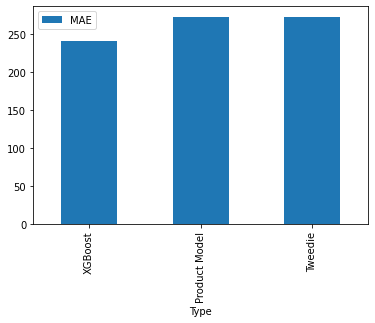

In [ ]:
dfMetrics.plot(x="Type", y=["MAE"], kind="bar")

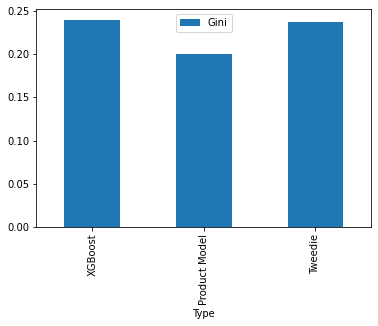

In [ ]:
dfMetrics.plot(x="Type", y=["Gini"], kind="bar")

### 📉Lorenz Curve

[]

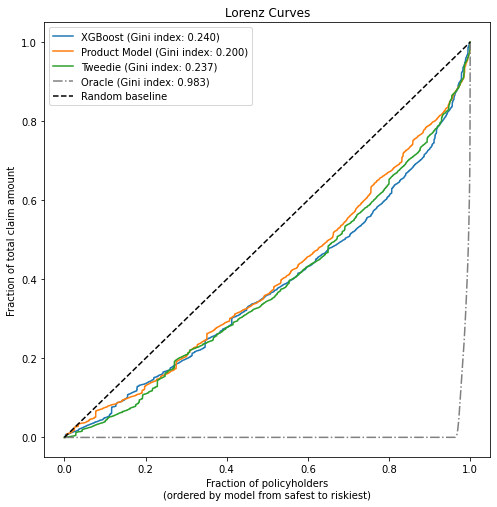

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

fig, ax = plt.subplots(figsize=(8, 8))


for metricsdata in MetricsData:
  label = metricsdata["Type"] + " (Gini index: {:.3f})".format(metricsdata["Gini"] )
  ax.plot(metricsdata["cum_samples"], metricsdata["cum_claim_amount"], linestyle="-", label=label)


# Oracle model: y_pred == y_test
ordered_samples, cum_claims, Gini = lorenz_curve(
    df_test["PurePremium"], df_test["PurePremium"], df_test["Exposure"]
)
gini = 1 - 2 * auc(ordered_samples, cum_claims)
label = "Oracle (Gini index: {:.3f})".format(gini)
ax.plot(ordered_samples, cum_claims, linestyle="-.", color="gray", label=label)

# Random baseline
ax.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random baseline")
ax.set(
    title="Lorenz Curves",
    xlabel="Fraction of policyholders\n(ordered by model from safest to riskiest)",
    ylabel="Fraction of total claim amount",
)
ax.legend(loc="upper left")
plt.plot()

## 💡 Explainability

### Shap Summary

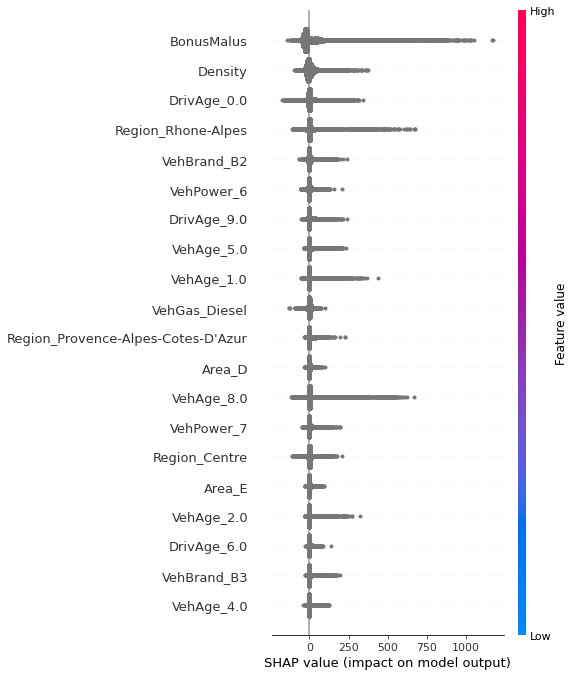

In [ ]:
import shap

pred = xbg_reg_opt.predict(X_test, output_margin=True)
explainer = shap.TreeExplainer(xbg_reg_opt,feature_names=columnNames)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X,feature_names=columnNames)

### Variable Importance

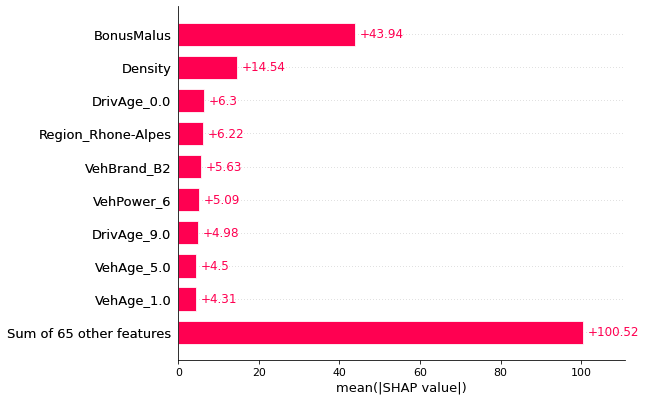

In [ ]:
from shap import TreeExplainer, Explanation
from shap.plots import waterfall, bar

explainer = TreeExplainer(xbg_reg_opt)
sv = explainer(X_test)
exp = Explanation(sv.values[:,:], 
                  sv.base_values[:], 
                  data=X_test, 
                  feature_names=columnNames)
idx = 0
bar(exp)

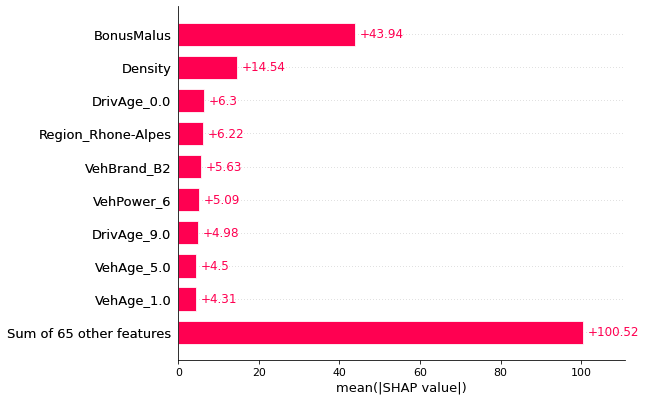

In [ ]:
from shap import TreeExplainer, Explanation
from shap.plots import waterfall, bar

explainer = TreeExplainer(xbg_reg_opt)
sv = explainer(X_test)
exp = Explanation(sv.values[:,:], 
                  sv.base_values[:], 
                  data=X_test, 
                  feature_names=columnNames)
idx = 0
bar(exp)


### Sample Impact

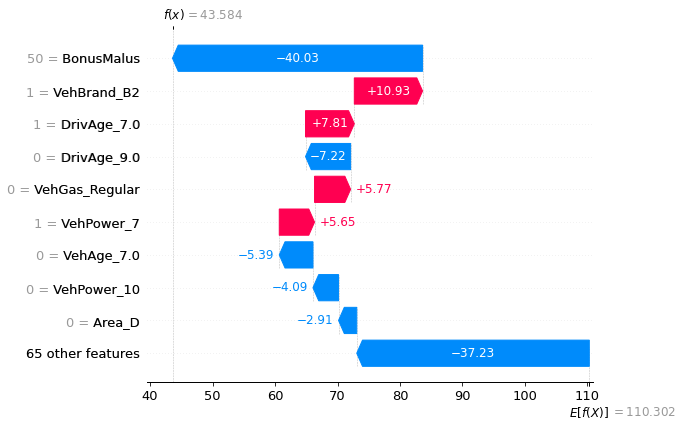

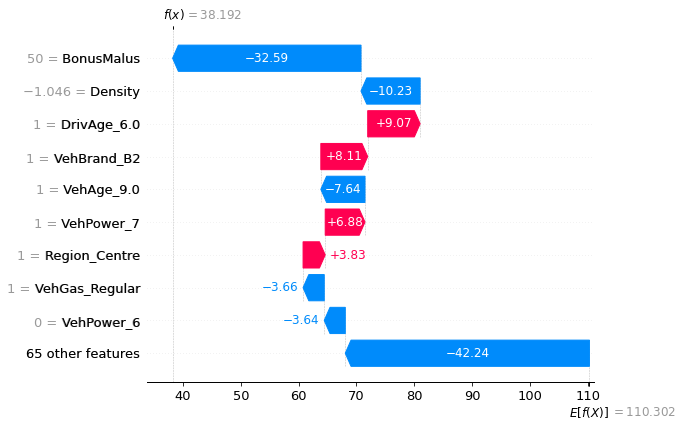

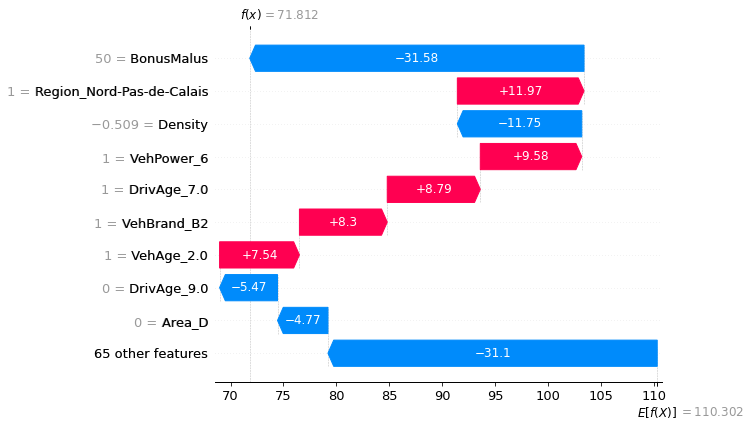

In [ ]:
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

explainer = TreeExplainer(xbg_reg_opt)
sv = explainer(X_test)
exp = Explanation(sv.values[:,:], 
                  sv.base_values[:], 
                  data=X_test, 
                  feature_names=columnNames)

waterfall(exp[0])                       
waterfall(exp[1000])
waterfall(exp[10000])

In [ ]:


df_train.to_parquet(f"{DataFolder}/train_encoded_dataset.parquet")
df_test.to_parquet(f"{DataFolder}/test_encoded_dataset.parquet")

with open(f"{DataFolder}/encoded_dataset.npy", 'wb') as f:                                                                       
    np.save(f, X_train)
    np.save(f, X_test)